UPLOAD YOUR Network Traffic file in CSV format

In [36]:
from google.colab import files


In [6]:
uploaded = files.upload()

Saving wireshark_url.csv to wireshark_url.csv


In [12]:
import pandas as pd
import io
wireshark_data=pd.read_csv(io.BytesIO(uploaded["wireshark_url.csv"]))

In [13]:
wireshark_data.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,172.27.68.75,255.255.255.255,UDP,245,6537 > 6537 Len=203
1,2,0.000000,172.27.68.75,255.255.255.255,UDP,245,6537 > 6537 Len=203
2,3,0.018132,49.44.197.202,172.27.68.210,TCP,60,80 > 33717 [ACK] Seq=1 Ack=1 Win=502 Len=0
3,4,0.018132,49.44.197.202,172.27.68.210,HTTP,241,HTTP/1.1 200 OK (text/plain)
4,5,0.018298,172.27.68.210,49.44.197.202,TCP,54,"33717 > 80 [FIN, ACK] Seq=1 Ack=188 Win=1025..."
5,6,0.018873,49.44.197.202,172.27.68.210,TCP,60,"80 > 33717 [FIN, ACK] Seq=188 Ack=1 Win=502 ..."
6,7,0.019013,172.27.68.210,49.44.197.202,TCP,54,33717 > 80 [ACK] Seq=2 Ack=189 Win=1025 Len=0
7,8,0.065789,172.27.71.116,239.255.255.250,SSDP,179,M-SEARCH * HTTP/1.1
8,9,0.070601,49.44.197.202,172.27.68.210,TCP,60,80 > 33717 [ACK] Seq=189 Ack=2 Win=502 Len=0
9,10,0.077519,172.27.68.202,224.2.2.2,UDP,72,59616 > 8995 Len=30


Now that our data is in a neat data frame, we can use the functions:

groupby() → select column to identify and group by unique values

count() → count how many times a value appears in the data frame as a value

sort_values → display values based on size

We are going to use these functions to understand devices that initiated conversations, accepted communications, and types of communications.

Taking a look at “sources” reveals which devices had the least/most number of communications.

In [14]:
sources=wireshark_data.groupby("Source").Source.count()
sources.sort_values()

Source
52.182.143.211                  1
52.123.129.254                  1
52.240.156.206                  1
40.99.111.34                    1
::                              1
                             ... 
fe80::9b2c:5df0:d81e:14c7     380
172.27.16.10                  392
172.27.70.170                 416
ASUSTekC_1e:85:70             515
172.27.68.210                1704
Name: Source, Length: 175, dtype: int64

In [15]:
destinations=wireshark_data.groupby("Destination").Source.count()
destinations.sort_values()

Destination
239.255.102.18          1
239.255.255.100         1
Cisco_48:70:31          1
ff02::1                 1
ff02::1:ff02:3cdf       1
                     ... 
172.27.16.10          462
224.2.2.2             524
239.255.255.250       624
Broadcast             634
172.27.68.210        1656
Name: Source, Length: 122, dtype: int64

In [16]:
protocols=wireshark_data.groupby("Protocol").Source.count()
protocols.sort_values()

Protocol
IGMPv1                 1
NBNS                   3
AJP13                  4
SSL                    4
HTTP                   5
DB-LSP-DISC/JSON      24
IGMPv2                26
DHCP                  34
LLMNR                 39
IGMPv3                57
ICMP                  60
DHCPv6                61
STP                   86
ICMPv6               159
TLSv1.2              176
DNS                  187
TLSv1.3              245
MDNS                 303
ARP                  647
UDP                  778
QUIC                 918
SSDP                 924
TCP                 1607
Name: Source, dtype: int64

**Apply Graph Theory**

Using networkx in Python, you can build node graphs that represent a type of communication.

Since our data is in a pandas data frame, we can use networkx directly on it and select our nodes as “source” and “target”. The nodes we are interested in are “Source” and “Destination”. Choosing these nodes will help us see how devices on this network communicate.

In [35]:
import networkx as nx

# Creating a graph based on communication nodes
network = nx.from_pandas_edgelist(wireshark_data.head(25), source='Source', target='Destination', edge_attr=True)
#here we are taking only top 25 data sets


In [27]:
network.edges()

EdgeView([('172.27.68.75', '255.255.255.255'), ('172.27.68.75', '172.27.68.210'), ('49.44.197.202', '172.27.68.210'), ('172.27.68.210', '216.58.203.10'), ('172.27.68.210', '239.255.255.250'), ('172.27.71.116', '239.255.255.250'), ('239.255.255.250', '172.27.70.167'), ('239.255.255.250', '172.27.70.170'), ('239.255.255.250', '172.27.70.198'), ('239.255.255.250', '172.27.68.134'), ('239.255.255.250', '172.27.70.157'), ('172.27.68.202', '224.2.2.2'), ('224.2.2.2', '172.27.71.164'), ('224.2.2.2', '172.27.70.198'), ('224.2.2.2', '172.27.69.124'), ('224.2.2.2', '172.27.71.240'), ('224.2.2.2', '172.27.69.156'), ('TCLKingE_f5:63:5f', 'Broadcast'), ('Broadcast', 'Hitex_39:03:e2'), ('Broadcast', 'CeLink_ec:e2:c2'), ('Broadcast', 'Cisco_48:70:63'), ('172.27.76.59', '172.27.69.192'), ('fe80::1e61:b4ff:febd:928f', 'ff02::2'), ('Cisco_f6:49:1a', 'PVST+')])

The little bit of code that was cut on the first cell is “edge_attr=True”).

With our chosen nodes, we’ll use networkx again with the function draw_circular to display a network map based on the traffic!

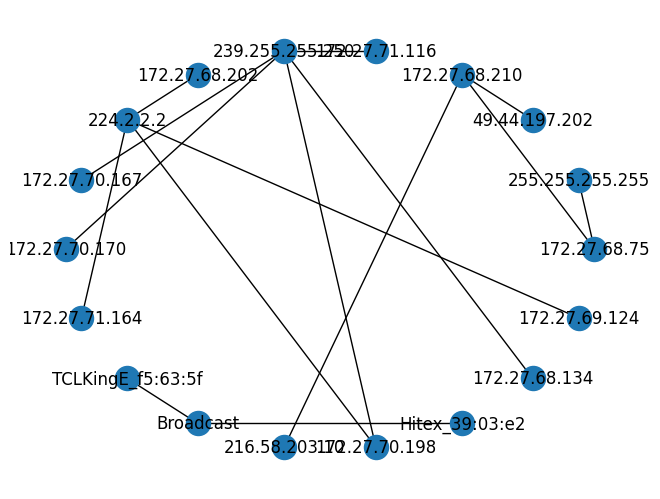

In [30]:
# Visualizing the network map
nx.draw_circular(network, with_labels=True)
plt.show()


Now, let’s say you red flag a device. You don’t recognize its owner so its activity should not appear in your private network traffic.

We’ll call that device suspect and use networkx to create a color-coded map showing us which devices the malicious device communicated with.

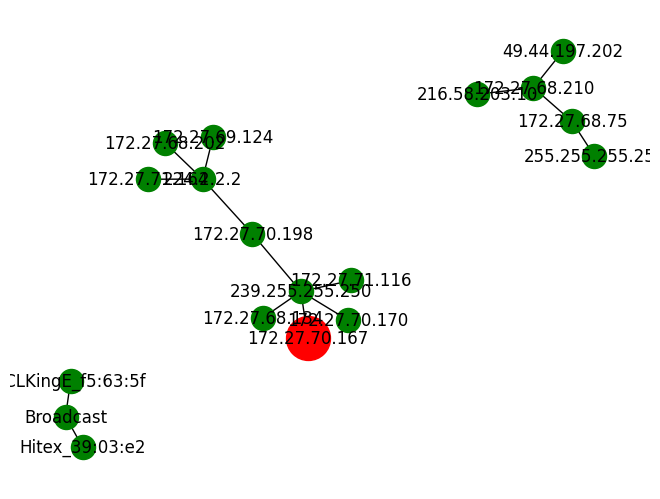

In [32]:
suspect='172.27.70.167'
pos=nx.spring_layout(network)
nx.draw(network,pos,node_color="green",node_size=300, with_labels=True)
options={"node_size" : 1000, "node_color":"r"}
nx.draw_networkx_nodes(network ,pos, nodelist=[suspect], **options)
plt.show()

Observing our results we see which devices it communicated with and other devices it could have potentially reached.

Taking a deeper look at the malicious device, we can make a new data frame that includes other devices it communicated with, type of communication, the time it happened, and information about it.

In [31]:
wireshark_data.loc[wireshark_data['Source']=='172.27.70.167']

,No.,Time,Source,Destination,Protocol,Length,Info
10,11,0.115719,172.27.70.167,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
11,12,0.131027,172.27.70.167,239.255.255.250,SSDP,216,M-SEARCH * HTTP/1.1
40,41,1.121408,172.27.70.167,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
41,42,1.136645,172.27.70.167,239.255.255.250,SSDP,216,M-SEARCH * HTTP/1.1
58,59,2.129411,172.27.70.167,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
59,60,2.139492,172.27.70.167,239.255.255.250,SSDP,216,M-SEARCH * HTTP/1.1
102,103,3.141171,172.27.70.167,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
103,104,3.141171,172.27.70.167,239.255.255.250,SSDP,216,M-SEARCH * HTTP/1.1
